In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,\
    accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/UFF/TCC/Implementação/

/content/drive/MyDrive/UFF/TCC/Implementação


In [4]:
df = pd.read_csv('dataset.csv')
X = df.drop(columns=['Activity'])
y = df['Activity']

# balanced_accuracy = (recall + specificity) / 2
metrics = ['f1_weighted', 'balanced_accuracy', 'accuracy']

In [5]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

## Report

In [ ]:
mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(200,),
                    random_state=42)

acc = cross_val_score(mlp, X=X, y=y, cv=10,
                      scoring=make_scorer(
                          classification_report_with_accuracy_score
                      ))

print("Accuracy")
print("mean = {mean:.2f}%;\tstd = {std:.2f};"
      .format(mean = acc.mean()*100,
              std = acc.std()))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass, predictedclass))

Accuracy
mean = 95.18%;	std = 0.02;
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00      1958
        LIE_TO_SIT       0.64      0.68      0.66        85
      LIE_TO_STAND       0.63      0.56      0.59        84
           SITTING       0.93      0.95      0.94      1801
        SIT_TO_LIE       0.73      0.75      0.74       107
      SIT_TO_STAND       0.94      1.00      0.97        33
          STANDING       0.96      0.94      0.95      1979
      STAND_TO_LIE       0.77      0.75      0.76       139
      STAND_TO_SIT       0.89      0.80      0.84        70
           WALKING       0.97      0.95      0.96      1722
WALKING_DOWNSTAIRS       0.97      0.98      0.97      1407
  WALKING_UPSTAIRS       0.94      0.96      0.95      1544

          accuracy                           0.95     10929
         macro avg       0.86      0.86      0.86     10929
      weighted avg       0.95      0.95      0.95     10929



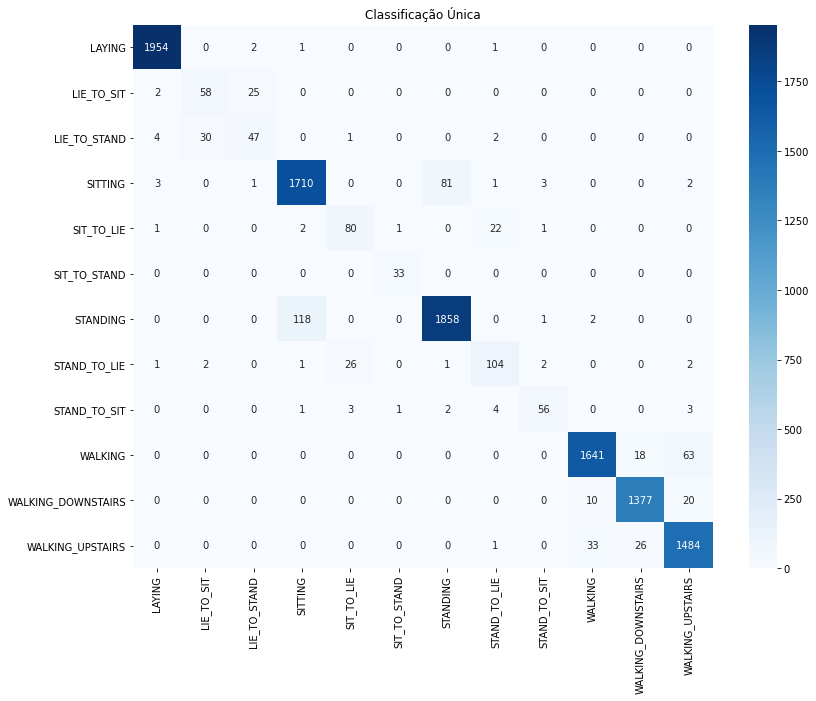

In [ ]:
cf_matrix = confusion_matrix(originalclass, predictedclass)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Única')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)


# Oversample

In [6]:
!pip install imblearn

In [7]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [8]:
originalclass = []
predictedclass = []

mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(250,),
                    random_state=42)

steps = [StandardScaler(), SMOTE(random_state=42), mlp]
imba_pipeline = make_pipeline(*steps)

acc = cross_val_score(imba_pipeline, X=X, y=y, cv=10,
                      scoring=make_scorer(
                          classification_report_with_accuracy_score
                      ))

print("Accuracy")
print("mean = {mean:.2f}%;\tstd = {std:.2f};"
      .format(mean = acc.mean()*100,
              std = acc.std()))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass, predictedclass))

Accuracy
mean = 94.89%;	std = 0.02;
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99      1958
        LIE_TO_SIT       0.68      0.68      0.68        85
      LIE_TO_STAND       0.65      0.63      0.64        84
           SITTING       0.94      0.93      0.93      1801
        SIT_TO_LIE       0.71      0.74      0.72       107
      SIT_TO_STAND       0.86      0.97      0.91        33
          STANDING       0.94      0.94      0.94      1979
      STAND_TO_LIE       0.75      0.74      0.75       139
      STAND_TO_SIT       0.90      0.81      0.86        70
           WALKING       0.97      0.95      0.96      1722
WALKING_DOWNSTAIRS       0.97      0.98      0.97      1407
  WALKING_UPSTAIRS       0.94      0.96      0.95      1544

          accuracy                           0.95     10929
         macro avg       0.86      0.86      0.86     10929
      weighted avg       0.95      0.95      0.95     10929

